In [2]:
from src.multilevel_FM import MLFM_recursive
from src.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from circuits.cp_fraction import cp_fraction
from src.FM_methods import set_initial_partitions

num_qubits = 96

num_partitions = 16

qpu_info = [int(num_qubits/num_partitions) + 1 for i in range(num_partitions)]

circuit = cp_fraction(num_qubits, num_qubits, 0.5)

circuit = transpile(circuit, basis_gates=['cp', 'u'])

graph = QuantumCircuitHyperGraph(num_qubits, circuit.depth())
graph.map_circuit_to_hypergraph(circuit,group_gates=True)

initial_assignment = set_initial_partitions(qpu_info, num_qubits, circuit.depth(),num_partitions, reduced=True)


assignment_list_r, cost_list_r, time_list_r = MLFM_recursive(graph,
                            initial_assignment,  
                            qpu_info, 
                            limit = 'qubit', 
                            pass_list= None, 
                            stochastic=True, 
                            lock_nodes=True,
                            log = False,
                            add_initial = False,
                            costs = None)

total_time_r = sum(time_list_r)
min_cost_r = min(cost_list_r)

print(min_cost_r)
total_time = 0

time_list = []
for time in time_list_r:
    total_time += time
    time_list.append(total_time)

KeyboardInterrupt: 

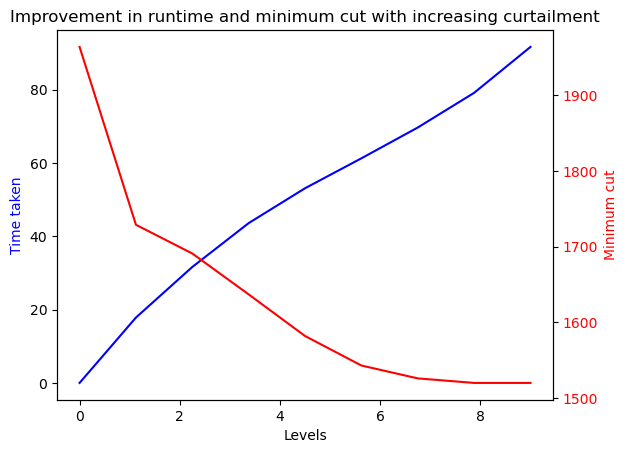

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, len(cost_list_r), len(cost_list_r))  # Create a list of numbers from 0 to 1 with 50 elements
y1 =  time_list      # Data for left y-axis
y2 =  cost_list_r    # Data for right y-axis

fig, ax1 = plt.subplots()

# Plot y1 against x using the primary y-axis (on the left)
ax1.plot(x, y1, color="blue", label="Runtime")
ax1.set_xlabel("Levels")
ax1.set_ylabel("Time taken", color="blue")

# Create a "twin" of the first Axes, i.e., share the same x-axis but have a new y-axis on the right
ax2 = ax1.twinx()
ax2.plot(x, y2, color="red", label="Minimum cut")
ax2.set_ylabel("Minimum cut", color="red")

# Optional: Make sure the second y-axis labels are in red
for tl in ax2.get_yticklabels():
    tl.set_color("red")

plt.title("Improvement in runtime and minimum cut with increasing curtailment")
plt.show()

In [44]:
num_qubits = 8

num_partitions = 2

time_list_outer = []
cost_list_outer = []

while num_qubits < 50:
    time_list  = []
    cost_list = []
    for j in range(5):
        qpu_info = [int(num_qubits/num_partitions) + 1 for i in range(num_partitions)]
        print("Number of qubits: ", num_qubits)

        circuit = cp_fraction(num_qubits, num_qubits, 0.5)

        circuit = transpile(circuit, basis_gates=['cp', 'u'])

        graph = QuantumCircuitHyperGraph(num_qubits, circuit.depth())
        graph.map_circuit_to_hypergraph(circuit,group_gates=True)

        initial_assignment = set_initial_partitions(qpu_info, num_qubits, circuit.depth(),num_partitions, reduced=True)


        assignment_list_r, cost_list_r, time_list_r = MLFM_recursive(graph,
                                    initial_assignment,  
                                    qpu_info, 
                                    limit = 'qubit', 
                                    pass_list= None, 
                                    stochastic=True, 
                                    lock_nodes=True,
                                    log = False,
                                    add_initial = False,
                                    costs = None)

        total_time_r = sum(time_list_r)
        min_cost_r = min(cost_list_r)

        time_list.append(total_time_r)
        cost_list.append(min_cost_r)
    
    num_qubits += 1
    time_list_outer.append(np.mean(time_list))
    cost_list_outer.append(np.mean(cost_list))





Number of qubits:  8
Number of qubits:  8
Number of qubits:  8
Number of qubits:  8
Number of qubits:  8
Number of qubits:  9
Number of qubits:  9
Number of qubits:  9
Number of qubits:  9
Number of qubits:  9
Number of qubits:  10
Number of qubits:  10
Number of qubits:  10
Number of qubits:  10
Number of qubits:  10
Number of qubits:  11
Number of qubits:  11
Number of qubits:  11
Number of qubits:  11
Number of qubits:  11
Number of qubits:  12
Number of qubits:  12
Number of qubits:  12
Number of qubits:  12
Number of qubits:  12
Number of qubits:  13
Number of qubits:  13
Number of qubits:  13
Number of qubits:  13
Number of qubits:  13
Number of qubits:  14
Number of qubits:  14
Number of qubits:  14
Number of qubits:  14
Number of qubits:  14
Number of qubits:  15
Number of qubits:  15
Number of qubits:  15
Number of qubits:  15
Number of qubits:  15
Number of qubits:  16
Number of qubits:  16
Number of qubits:  16
Number of qubits:  16
Number of qubits:  16
Number of qubits:  1

IndexError: list index out of range

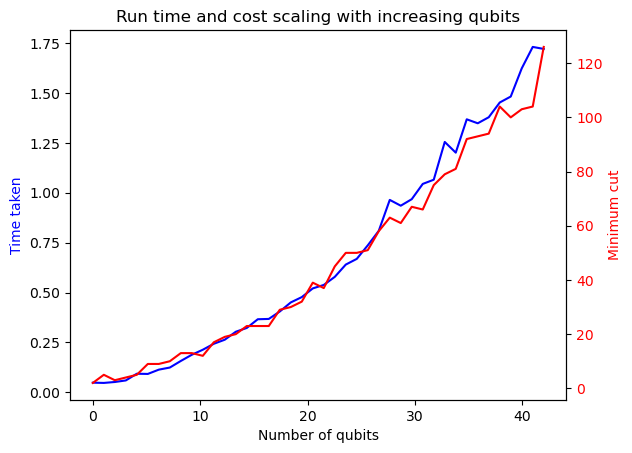

In [ ]:
x = np.linspace(0, len(cost_list), len(cost_list))  # Create a list of numbers from 0 to 1 with 50 elements
y1 =  time_list_outer      # Data for left y-axis
y2 =  cost_list_outer    # Data for right y-axis

fig, ax1 = plt.subplots()

# Plot y1 against x using the primary y-axis (on the left)
ax1.plot(x, y1, color="blue", label="Runtime")
ax1.set_xlabel("Number of qubits")
ax1.set_ylabel("Time taken", color="blue")

# Create a "twin" of the first Axes, i.e., share the same x-axis but have a new y-axis on the right
ax2 = ax1.twinx()
ax2.plot(x, y2, color="red", label="Minimum cut")
ax2.set_ylabel("Minimum cut", color="red")

# Optional: Make sure the second y-axis labels are in red
for tl in ax2.get_yticklabels():
    tl.set_color("red")

plt.title("Run time and cost scaling with increasing qubits")
plt.show()

In [12]:
from src.multilevel_FM import MLFM_recursive
from src.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from circuits.cp_fraction import cp_fraction
from src.FM_methods import set_initial_partitions

num_qubits = 48

num_partitions = 6

qpu_info = [int(num_qubits/num_partitions) + 1 for i in range(num_partitions)]

circuit = cp_fraction(num_qubits, num_qubits, 0.5)

circuit = transpile(circuit, basis_gates=['cp', 'u'])

graph = QuantumCircuitHyperGraph(num_qubits, circuit.depth())
graph.map_circuit_to_hypergraph(circuit,group_gates=True)

initial_assignment = set_initial_partitions(qpu_info, num_qubits, circuit.depth(),num_partitions, reduced=True)

from src.FM_main import run_FM

final_cost, final_assignment, cost_list_1 = run_FM(
    graph,
    initial_assignment,
    qpu_info,
    num_partitions,
    limit=num_qubits*graph.depth/8,
    max_gain=4,
    passes=100,
    stochastic=True,
    active_nodes=graph.nodes,
    log = False,
    add_initial = False,
    costs = None
)

total_time_r = sum(time_list_r)
min_cost_r = min(cost_list_1)

print(min_cost_r)
total_time = 0

time_list = []
for time in time_list_r:
    total_time += time
    time_list.append(total_time)

graph = QuantumCircuitHyperGraph(num_qubits, circuit.depth())
graph.map_circuit_to_hypergraph(circuit,group_gates=True)

initial_assignment = set_initial_partitions(qpu_info, num_qubits, circuit.depth(),num_partitions, reduced=True)

final_cost, final_assignment, cost_list_2 = run_FM(
    graph,
    initial_assignment,
    qpu_info,
    num_partitions,
    limit=num_qubits*graph.depth/8,
    max_gain=4,
    passes=100,
    stochastic=False,
    active_nodes=graph.nodes,
    log = False,
    add_initial = False,
    costs = None
)

total_time_r = sum(time_list_r)
min_cost_r = min(cost_list_2)

print(min_cost_r)
total_time = 0

time_list_2 = []
for time in time_list_r:
    total_time += time
    time_list_2.append(total_time)

306
335


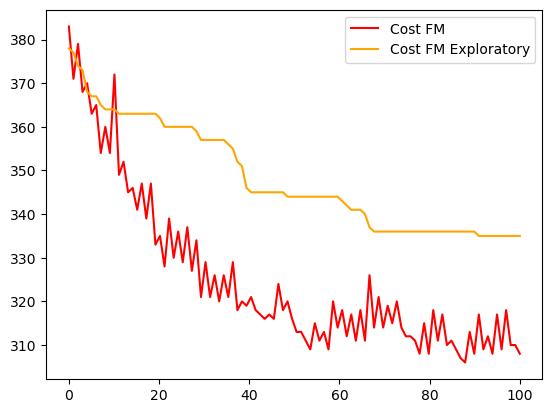

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, len(cost_list_1), len(cost_list_1))  # Create a list of numbers from 0 to 1 with 50 elements
y1 =  time_list      # Data for left y-axis
y2 =  cost_list_1    # Data for right y-axis
y3 =  cost_list_2    # Data for right y-axis
y4 =  time_list_2      # Data for left y-axis

fig, ax1 = plt.subplots()
# plt.plot(x, y1, color="blue", label="Runtime")
# plt.plot(x, y4, color="green", label="Runtime")

plt.plot(x, y2, color="red", label="Cost FM")
plt.plot(x, y3, color="orange", label="Cost FM Exploratory")

plt.legend()

